<h1>Data Preparation</h1>

<h4> 1. Import the dataset </h4>

In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('Customer Service_Requests_from_2010_to_Present.csv', low_memory=False)
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


<h4>2. Convert the columns "Created Date" and "Closed Date" to datetime 
datatype and create a new column "Request_Closing_Time" as the time elapsed between request creation and request closing.</h4>

In [7]:
# Showing original data and types before conversion
print("Before conversion:")
print("First 6 rows:")
print(df[['Created Date', 'Closed Date']].head(6))
print("\nData types:")
print(df[['Created Date', 'Closed Date']].dtypes)

# Converting to datetime format using 'mixed'
df['Created Date'] = pd.to_datetime(df['Created Date'], format="mixed")
df['Closed Date'] = pd.to_datetime(df['Closed Date'], format="mixed")

# Calculating time taken to close the request
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']

# Showing data and types after conversion
print("\nAfter conversion:")
print("First 6 rows:")
print(df[['Created Date', 'Closed Date', 'Request_Closing_Time']].head(6))
print("\nData types:")
print(df[['Created Date', 'Closed Date', 'Request_Closing_Time']].dtypes)


Before conversion:
First 6 rows:
             Created Date    Closed Date
0  12/31/2015 11:59:45 PM  01-01-16 0:55
1  12/31/2015 11:59:44 PM  01-01-16 1:26
2  12/31/2015 11:59:29 PM  01-01-16 4:51
3  12/31/2015 11:57:46 PM  01-01-16 7:43
4  12/31/2015 11:56:58 PM  01-01-16 3:24
5  12/31/2015 11:56:30 PM  01-01-16 1:50

Data types:
Created Date    object
Closed Date     object
dtype: object

After conversion:
First 6 rows:
         Created Date         Closed Date Request_Closing_Time
0 2015-12-31 23:59:45 2016-01-01 00:55:00      0 days 00:55:15
1 2015-12-31 23:59:44 2016-01-01 01:26:00      0 days 01:26:16
2 2015-12-31 23:59:29 2016-01-01 04:51:00      0 days 04:51:31
3 2015-12-31 23:57:46 2016-01-01 07:43:00      0 days 07:45:14
4 2015-12-31 23:56:58 2016-01-01 03:24:00      0 days 03:27:02
5 2015-12-31 23:56:30 2016-01-01 01:50:00      0 days 01:53:30

Data types:
Created Date             datetime64[ns]
Closed Date              datetime64[ns]
Request_Closing_Time    timedelta64[ns]


<h4>3. Write a python program to drop irrelevant Columns which are listed below.</h4>
<h5>['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1', 'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name', 'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type', 'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location']
</h5>

In [9]:
# Values Before dropping irrelevant columns
print("Before dropping irrelevant columns:")
print("Columns before dropping:")
print(df.columns)

# Droping irrelevant columns
irrelevant_columns = [
    'Agency Name', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
    'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'Park Facility Name',
    'Park Borough', 'School Name', 'School Number', 'School Region', 'School Code',
    'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip',
    'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
    'Taxi Pick Up location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
    'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name',
    'Landmark', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Due Date',
    'Resolution Action Updated Date', 'Community Board', 'Facility Type', 'Location'
]

# Removing the irrelevant columns
df = df.drop(columns=irrelevant_columns)

# Values After dropping irrelevant columns
print("\nAfter dropping irrelevant columns:")
print("Columns after dropping:")
print(df.columns)  


Before dropping irrelevant columns:
Columns before dropping:
Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp'

<h4>4. Write a python program to remove the NaN missing values from updated dataframe.</h4>

In [11]:
# Showing the number of NaN values in each column
print("\nBefore removing NaN values:")
print(df.isna().sum())  

# Droping NaN values
df.dropna(inplace=True)

# After removing NaN values
print("\nAfter removing NaN values:")
print(df.isna().sum())


Before removing NaN values:
Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Status                       0
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
Request_Closing_Time      2164
dtype: int64

After removing NaN values:
Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Status                    0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
Request_Closing_Time      0
dtype: int64


<h4>5. Write a python program to see the unique values from all the columns in the dataframe.</h4>

In [13]:
# Looping through all columns to print unique values
for column in df.columns:
    # Getting unique values for the column
    unique_vals = df[column].unique()
    
    # Printing column header
    print(f"Unique values in '{column}':")
    
    # Printing a table-like header
    print(f"{'Unique Value':<25}") 
    
    # Printing the first 10 unique values
    for val in unique_vals[:10]:
        print(f"{str(val):<25}") 
    
    # Printing a separator
    print("-" * 50)

Unique values in 'Unique Key':
Unique Value             
32310363                 
32309934                 
32309159                 
32305098                 
32306529                 
32306554                 
32306559                 
32307009                 
32308581                 
32308391                 
--------------------------------------------------
Unique values in 'Created Date':
Unique Value             
2015-12-31 23:59:45      
2015-12-31 23:59:44      
2015-12-31 23:59:29      
2015-12-31 23:57:46      
2015-12-31 23:56:58      
2015-12-31 23:56:30      
2015-12-31 23:55:32      
2015-12-31 23:54:05      
2015-12-31 23:53:58      
2015-12-31 23:52:58      
--------------------------------------------------
Unique values in 'Closed Date':
Unique Value             
2016-01-01 00:55:00      
2016-01-01 01:26:00      
2016-01-01 04:51:00      
2016-01-01 07:43:00      
2016-01-01 03:24:00      
2016-01-01 01:50:00      
2016-01-01 01:53:00      
2016-01-01 01:42:00   

<h1>Data Analysis</h1>

<h4>1. Write a Python program to show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of the data frame. </h4>

In [16]:
import pandas as pd

# Numeric summary statistics
numeric_stats = pd.DataFrame({
    'Sum': df.sum(numeric_only=True),
    'Mean': df.mean(numeric_only=True),
    'Standard Deviation': df.std(numeric_only=True),
    'Skewness': df.skew(numeric_only=True),
    'Kurtosis': df.kurtosis(numeric_only=True)
})

# Handling datetime columns by converting them to numeric timestamps
datetime_columns = df.select_dtypes(include=['datetime', 'datetime64']).columns

# Convert datetime columns to numeric (number of seconds since the earliest date)
for column in datetime_columns:
    df[column] = pd.to_datetime(df[column], errors='coerce')  # Ensure datetime format
    df[column] = (df[column] - df[column].min()).dt.total_seconds()  # Convert to seconds since min date

# Summary statistics for datetime columns (now as numeric values)
datetime_stats = pd.DataFrame({
    'Sum': df[datetime_columns].sum(),
    'Mean': df[datetime_columns].mean(),
    'Standard Deviation': df[datetime_columns].std(),
    'Skewness': df[datetime_columns].skew(),
    'Kurtosis': df[datetime_columns].kurtosis()
})

# Combining numeric and datetime summary statistics
summary_stats = pd.concat([numeric_stats, datetime_stats], axis=0)

# Printing the summary statistics
for column in summary_stats.index:
    print(f"\nSummary Statistics for '{column}':")
    print(f"Sum         : {summary_stats.loc[column, 'Sum']}")
    print(f"Mean        : {summary_stats.loc[column, 'Mean']}")
    print(f"Std Dev     : {summary_stats.loc[column, 'Standard Deviation']}")
    print(f"Skewness    : {summary_stats.loc[column, 'Skewness']}")
    print(f"Kurtosis    : {summary_stats.loc[column, 'Kurtosis']}")



Summary Statistics for 'Unique Key':
Sum         : 9112107955295.0
Mean        : 31301576.242738925
Std Dev     : 575377.7387071876
Skewness    : 0.016897722422296077
Kurtosis    : -1.1765926558306596

Summary Statistics for 'Incident Zip':
Sum         : 3160833212.0
Mean        : 10857.977348535074
Std Dev     : 580.2807740122854
Skewness    : -2.553955898131983
Kurtosis    : 37.827777247855444

Summary Statistics for 'Latitude':
Sum         : 11855530.75877829
Mean        : 40.72568079358549
Std Dev     : 0.08241087015112669
Skewness    : 0.123114382634822
Kurtosis    : -0.7348182547719988

Summary Statistics for 'Longitude':
Sum         : -21520095.167681944
Mean        : -73.92503501352404
Std Dev     : 0.07865355626291955
Skewness    : -0.3127386420474719
Kurtosis    : 1.455600458821316


<h4>2. Write a Python program to calculate and show correlation of all variables. </h4>

              Unique Key  Incident Zip  Latitude  Longitude
Unique Key      1.000000      0.025492 -0.032613  -0.008621
Incident Zip    0.025492      1.000000 -0.499081   0.385934
Latitude       -0.032613     -0.499081  1.000000   0.368819
Longitude      -0.008621      0.385934  0.368819   1.000000


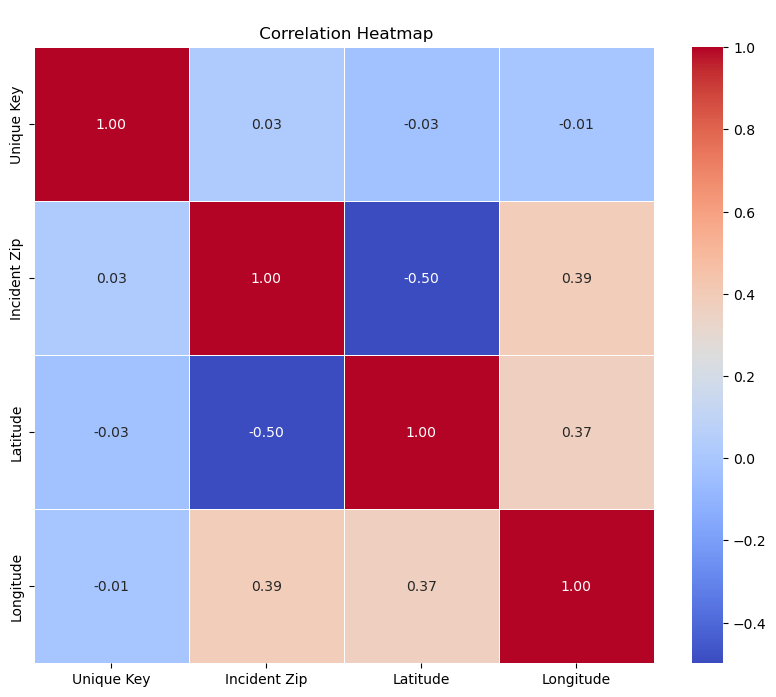

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the correlation matrix for numeric columns
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("\n Correlation Heatmap")
plt.show()


<h1>4. Data Exploration</h1>

<h4>1. Provide four major insights through visualization that you come up after data mining.</h4>

<h5><b> Insight 1: Top 5 Complaint Types by Count </b> </h5>

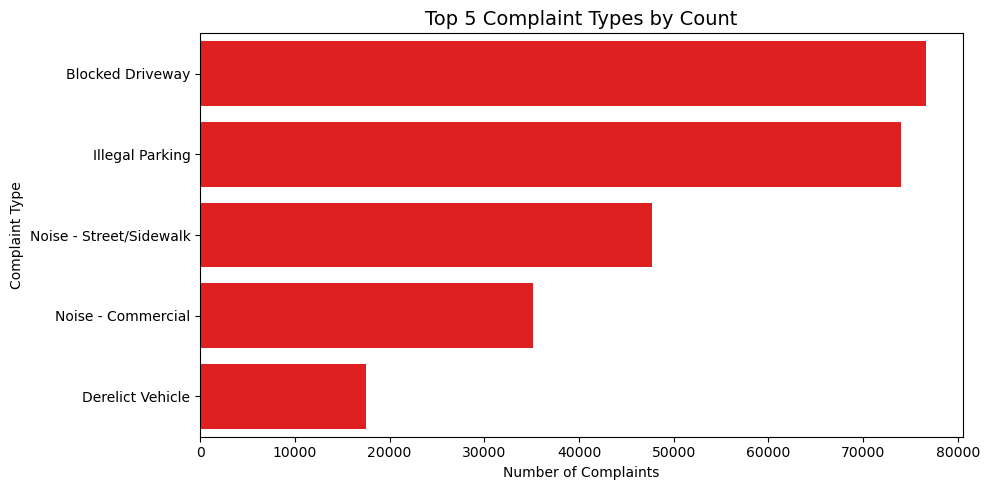

In [22]:

# Top 5 complaint types
top_complaints = df['Complaint Type'].value_counts().nlargest(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_complaints.values, y=top_complaints.index, color='red')

plt.title('Top 5 Complaint Types by Count', fontsize=14)
plt.xlabel('Number of Complaints')
plt.ylabel('Complaint Type')
plt.tight_layout()
plt.show()

<h5> <b>Insight 2: Complaint Type by Location Type </b></h5>

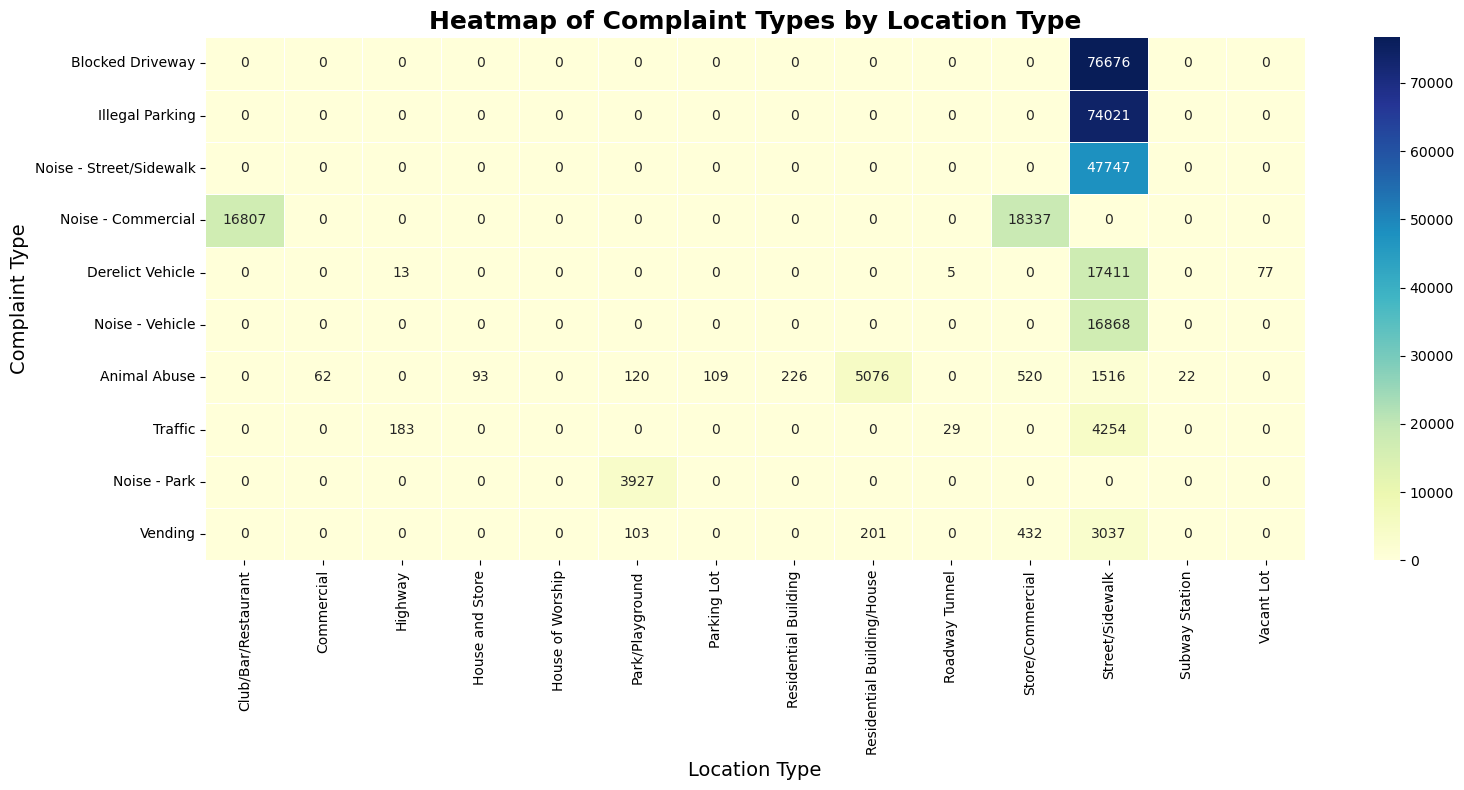

In [24]:
# Creating a pivot table
pivot = df.pivot_table(index='Complaint Type', columns='Location Type', aggfunc='size', fill_value=0)


pivot = pivot.loc[df['Complaint Type'].value_counts().nlargest(10).index]

plt.figure(figsize=(16, 8))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Heatmap of Complaint Types by Location Type', fontsize=18, weight='bold')
plt.xlabel('Location Type', fontsize=14)
plt.ylabel('Complaint Type', fontsize=14)
plt.tight_layout()
plt.show()


<h5><b>Insight 3: Distribution of Total Complaint Resolution Time Across Boroughs</b> </h5>

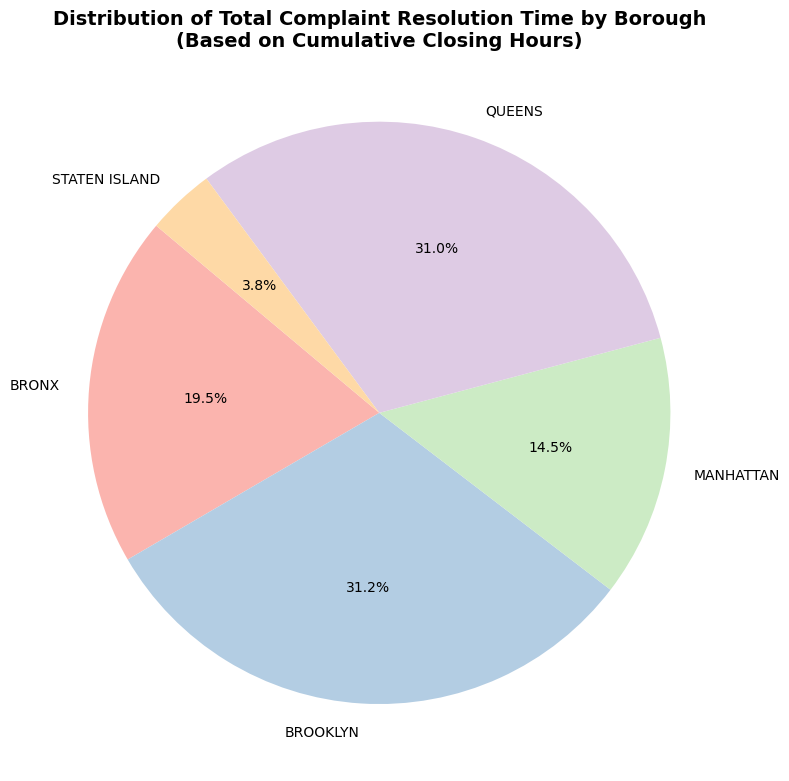

In [26]:
df['Closing_Hours'] = df['Request_Closing_Time'].dt.total_seconds() / 3600
borough_closing_time = df.groupby('Borough')['Closing_Hours'].sum()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(borough_closing_time, labels=borough_closing_time.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)

plt.title('Distribution of Total Complaint Resolution Time by Borough\n(Based on Cumulative Closing Hours)', fontsize=14, weight='bold')
plt.axis('equal')  
plt.tight_layout()
plt.show()

<h5><b>Insight 4: Monthly Trends of Top 5 Complaint Types </b> </h5>

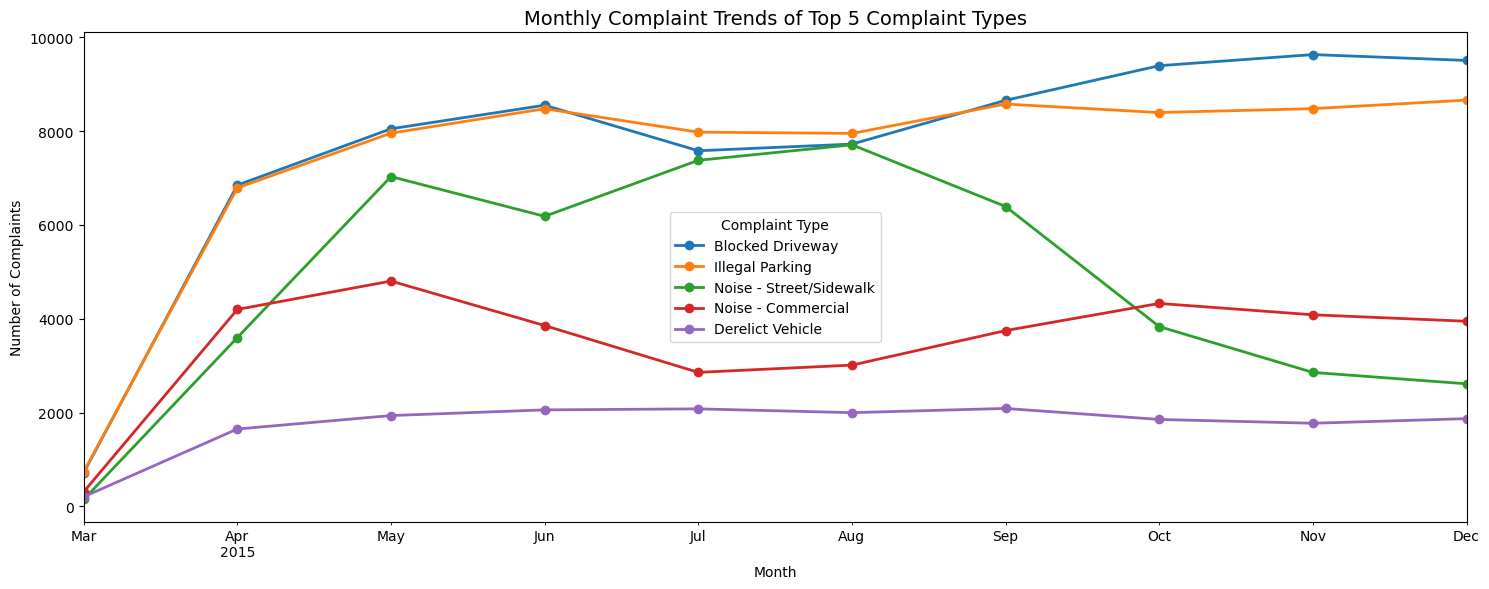

In [46]:

df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Month'] = df['Created Date'].dt.to_period('M')

# Grouping monthly complaint count by type
monthly_trends = df.groupby(['Month', 'Complaint Type']).size().unstack(fill_value=0)
top_types = df['Complaint Type'].value_counts().nlargest(5).index

# Plot with dots added
monthly_trends[top_types].plot(figsize=(15, 6), linewidth=2, marker='o')

plt.title('Monthly Complaint Trends of Top 5 Complaint Types', fontsize=14)
plt.ylabel('Number of Complaints')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Complaint Type')
plt.tight_layout()
plt.show()



<h4>2.Arrange the complaint types according to their average 'Request_Closing_Time', categorized by various locations. Illustrate it through graph as well.</h4>

<Figure size 1400x1000 with 0 Axes>

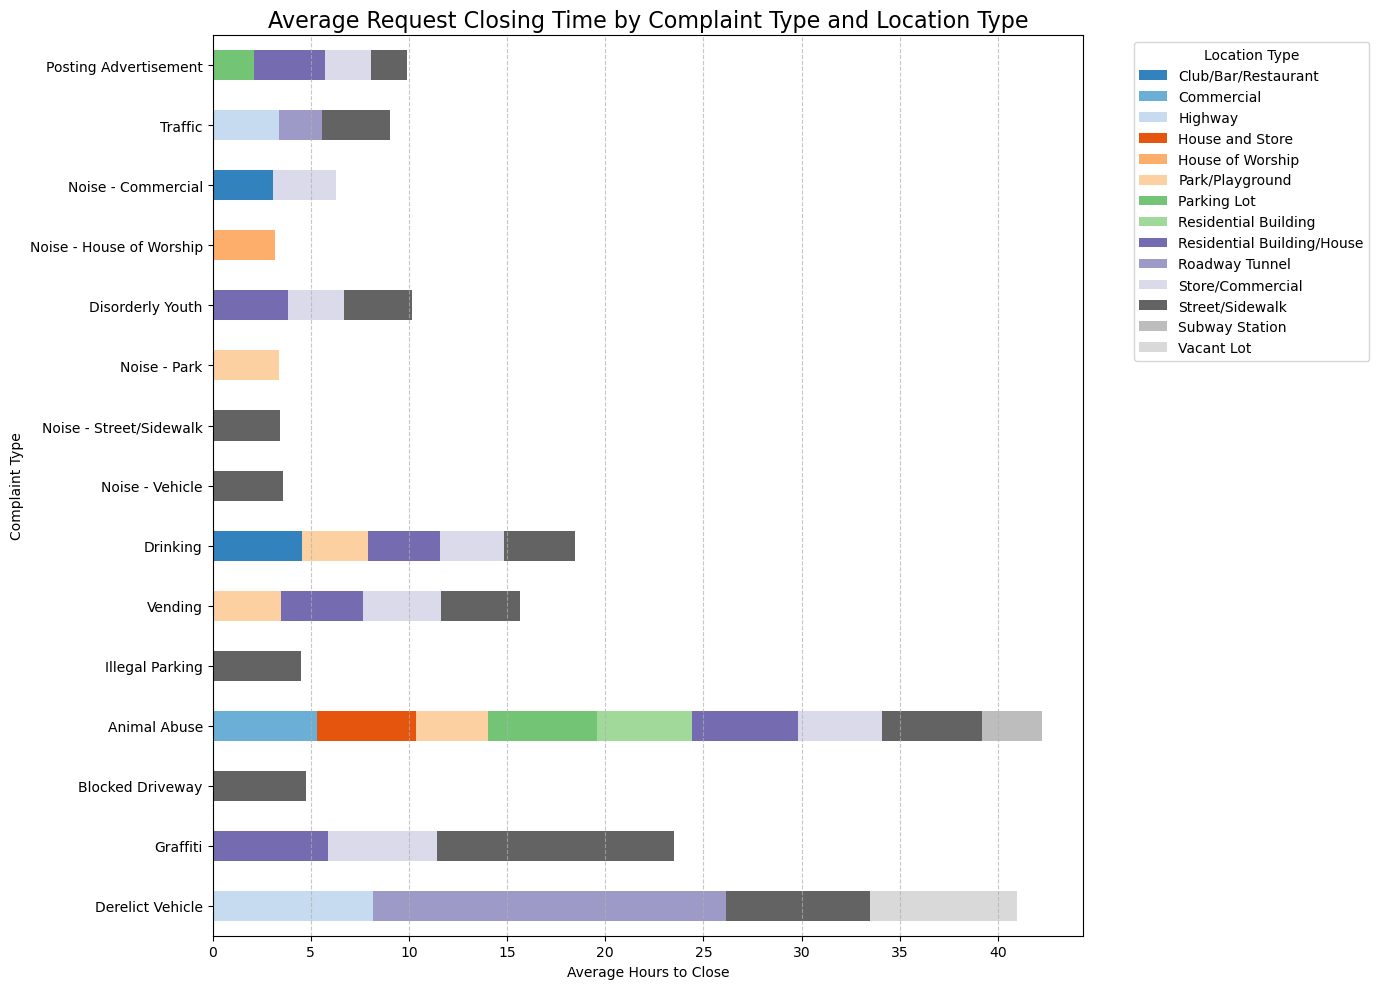

In [42]:
# If 'Request_Closing_Time' is a Timedelta, convert it to hours (or minutes if preferred)
df['Request_Closing_Time'] = df['Request_Closing_Time'].dt.total_seconds() / 3600  # Convert to hours

# Grouping by Complaint Type and Location Type, compute average closing time
avg_closing = df.groupby(['Complaint Type', 'Location Type'])['Request_Closing_Time'].mean().unstack()

# Sorting by overall average across location types
avg_closing['Mean'] = avg_closing.mean(axis=1)
avg_closing = avg_closing.sort_values(by='Mean', ascending=False)
avg_closing = avg_closing.drop(columns='Mean')

# Plotting
plt.figure(figsize=(14, 10))
avg_closing.plot(kind='barh', stacked=True, figsize=(14, 10), colormap='tab20c')

plt.title('Average Request Closing Time by Complaint Type and Location Type', fontsize=16)
plt.xlabel('Average Hours to Close')
plt.ylabel('Complaint Type')
plt.legend(title='Location Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


<h1> Statistical Testing</h1>

<h4>1. Test 1: Whether the average response time across complaint types is similar or not.<br>
State the Null Hypothesis (H0) and Alternate Hypothesis (H1).<br>
Perform the statistical test and provide the p-value.<br>
Interpret the results to accept or reject the Null Hypothesis.<br>
</h4>


In [44]:
from scipy.stats import f_oneway

# H0: The mean closing time is the same for all complaint types
# H1: At least one complaint type has a different mean closing time

# Grouping the data by Complaint Type and collecting Closing_Hours
groups = [group['Closing_Hours'].values for _, group in df.groupby('Complaint Type')]

# Performing the ANOVA test
f_stat, p_val = f_oneway(*groups)

# Significance level
alpha = 0.05

# Output the F-statistic and p-value

print("The p-value of our test is", p_val)

# Hypothesis checking
if p_val <= alpha:
    print("We can reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")


The ANOVA F-statistic is 578.9120337398356
The p-value of our test is 0.0
We can reject the null hypothesis.


<h4>2. Test 2: Whether the type of complaint or service requested and location are related. <br>
State the Null Hypothesis (H0) and Alternate Hypothesis (H1). <br>
Perform the statistical test and provide the p-value. <br>
Interpret the results to accept or reject the Null Hypothesis. <br>
 
</h4>

In [ ]:
from scipy.stats import chi2_contingency

# H0: Complaint type and borough are independent (no relationship)
# H1: Complaint type and borough are not independent (they are related)


# Creating the contingency table
ct = pd.crosstab(df['Complaint Type'], df['Borough'])

# Performing the Chi-square test
test, p_val, dof, expected_val = chi2_contingency(ct)

# Significance level
alpha = 0.05


print("The Chi-square statistic is", test)
print("The p-value of our test is", p_val)

# Hypothesis checking
if p_val <= alpha:
    print('We can reject the null hypothesis')
else:
    print('We can accept the null hypothesis')